<a href="https://colab.research.google.com/github/MimaDalix/Deep-Learning-tensorflow/blob/main/10_time_series_forecasting_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with TensorFlow + Milestone Ptoject 3:  BitPredict 💰💰

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

* All resources: https://github.com/mrdbourke/tensorflow-deep-learning#-10-time-series-fundamentals-and-milestone-project-3-bitpredict--exercises
* Book version of code/text: https://dev.mrdbourke.com/tensorflow-deep-learning/

 ## Get data

 We're going to be using the historical price data of Bitcoin to try and predict the futur price of Bitcoin, we downloaded the data from here:
 https://www.coindesk.com/price/bitcoin/

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-12-12 07:55:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-12-12 07:55:27 (7.18 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



## Importing time series with pandas 

In [2]:
# Import with pandas 
import pandas as pd 

# Let's read in our Bitcoin data and parse the data 
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date']) # Parse the data column and tell pandas column data is a datatime 

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
# How many simples do we have ?
len(df)


2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learnin models usually likes lots and lots of samples (where lots and lots can be thousands to ten thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑**Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So, for our Bitcoin data, it has a seasonality of daily value of 364 because we collect one sample per day meaning we'll get 365 sample per year.

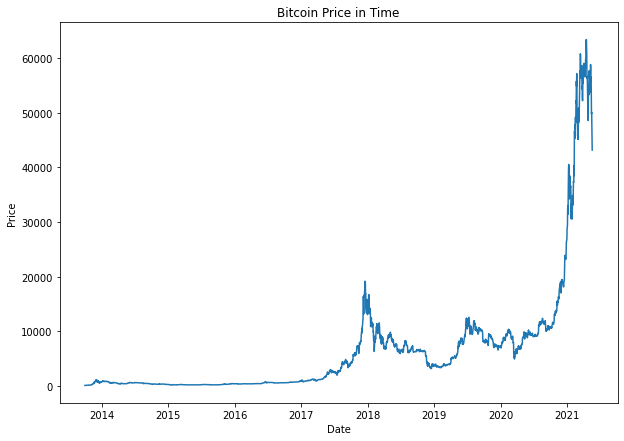

In [6]:
import matplotlib.pyplot as plt 

# Plotting the price 
plt.figure(figsize=(10, 7))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Bitcoin Price in Time")

plt.plot(df['Closing Price (USD)'])

In [7]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


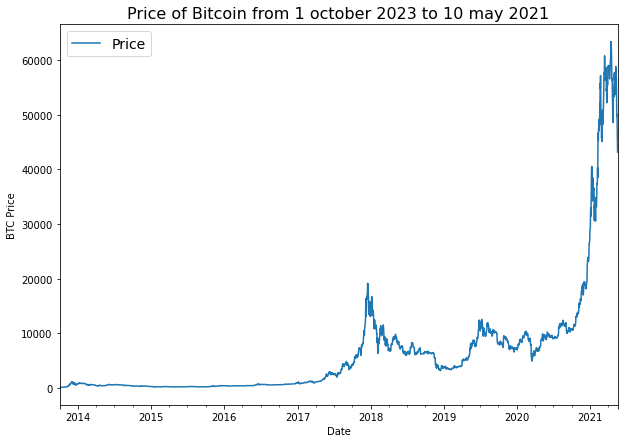

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 october 2023 to 10 may 2021', fontsize=16)
plt.legend(fontsize=14)

In [9]:
# Read in the file with python csv 
import csv 

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', newline='') as csvfile:
  file = csv.reader(csvfile, delimiter=' ', quotechar='|')
  for row in file:
    print(', '.join(row))

Currency,Date,Closing, Price, (USD),24h, Open, (USD),24h, High, (USD),24h, Low, (USD)
BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
BTC,2013-10-02,125.455,123.65499,125.7585,123.63383
BTC,2013-10-03,108.58483,125.455,125.66566,83.32833
BTC,2013-10-04,118.67466,108.58483,118.675,107.05816
BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566
BTC,2013-10-06,120.65533,121.33866,121.85216,120.5545
BTC,2013-10-07,121.795,120.65533,121.99166,120.43199
BTC,2013-10-08,123.033,121.795,123.64016,121.35066
BTC,2013-10-09,124.049,123.033,124.7835,122.59266
BTC,2013-10-10,125.96116,124.049,128.01683,123.81966
BTC,2013-10-11,125.27966,125.96116,126.43666,124.11383
BTC,2013-10-12,125.9275,125.27966,126.0365,123.12966
BTC,2013-10-13,126.38333,125.9275,126.8965,125.2765
BTC,2013-10-14,135.24199,126.38333,135.24199,126.255
BTC,2013-10-15,133.20333,135.24199,135.69216,130.39275
BTC,2013-10-16,142.76333,133.20333,143.60483,132.94933
BTC,2013-10-17,137.92333,142.76333,145.601,136.01466
BTC,2013-1

## Importing time series data with python's CSV module 

In [10]:
# Importing and formatting historical Bitcoin data with python
import csv 
from datetime import datetime 

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)  # skip 1 st line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))  # get the dates as dates not strings 
    btc_price.append(float(line[2]))

# View first 10 od each 
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

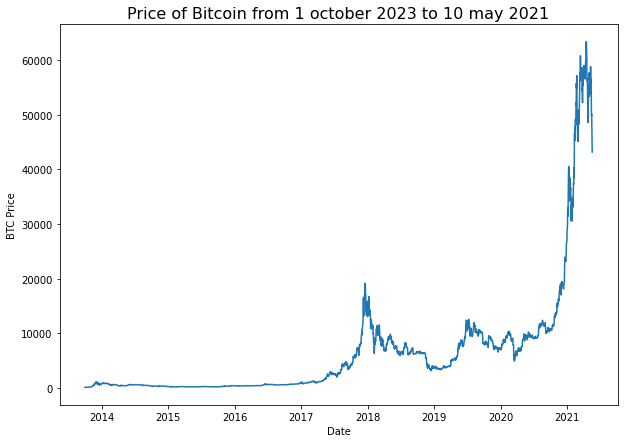

In [11]:
# Plot from CSV 
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 october 2023 to 10 may 2021', fontsize=16)
plt.xlabel('Date')

## Format part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [12]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [13]:
# Wrong way to make train/test sets for time series data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,  # dates
                                                    prices,  # BTC prices 
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

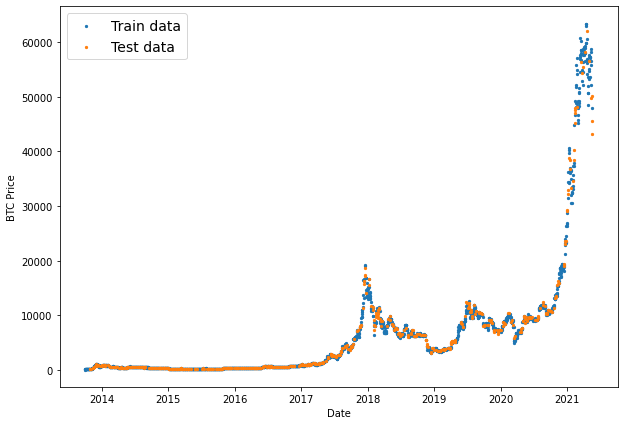

In [14]:
# Let's plt wrong train and test splits 
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

### Create train & test sets for time series (the right way)

In [15]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

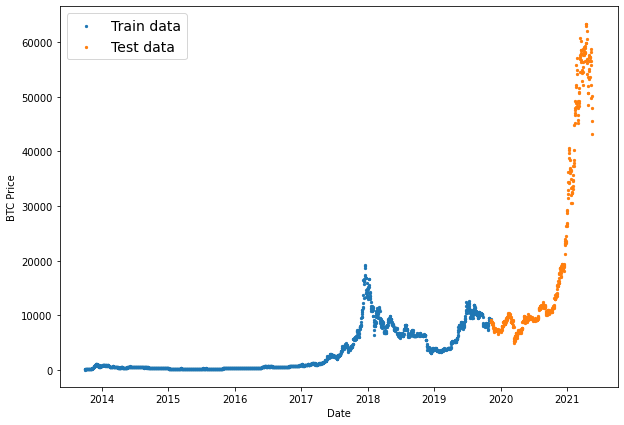

In [16]:
# Plot correctly made splits 
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

## Create a plotting function 

Typing plotting code is tedious, let's functionize it.

In [17]:
# Create plotting function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  '''
  Plots timesteps (a series of points in time) against value (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timestep values 
  values: array of values across time
  format: where to start the plot (setting a value will index from start of timesteps & values)
  end: where to end the plot (similar to start but for the end)
  label: label to show on plot about values , default None
  '''

  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

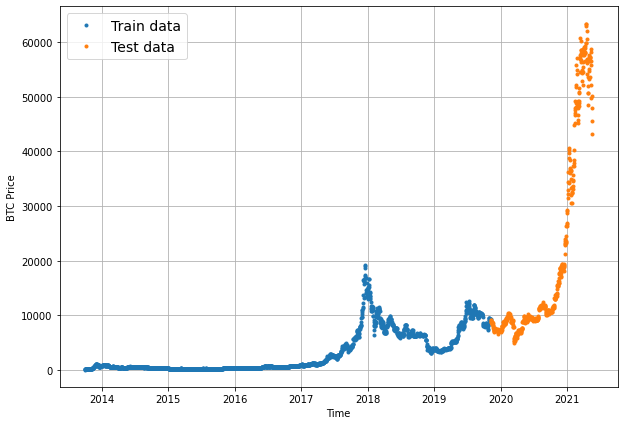

In [18]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')

## Modelling Experiments 

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the futur we're going to predict. 
* **Window size** = number of timesteps we're going to use to predict **horizon**.

Modelling experiments we're running:
* 0 	Naïve model (baseline) 	
* 1 	Dense model, (horizon=1, window=7)
* 2 	Same as 1, (horizon=1, window=30)
* 3 	Same as 1, (horizon = 7, window=30) 	
* 4 	Conv1D 	 	
* 5 	LSTM 	 	
* 6 	Same as 1 (but with multivariate data) 	1 	7 	Block reward size
* 7 	N-BEATs Algorithm 	
* 8 	Ensemble (multiple models optimized on different loss functions) 		
* 9 	Future prediction model (model to predict future values) 	
* 10 	Same as 1 (but with turkey 🦃 data introduced) 

## Model 0: Naive Forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t {y-hat} is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1. 


In [19]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [20]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

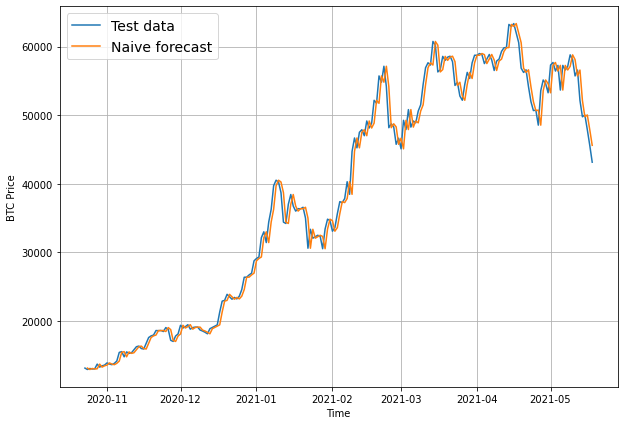

In [21]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
#plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test,start=350,format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-',start=350, label='Naive forecast')

> 🛠**Exercise:**  Spend 10m reading the simple forecast chapter of Forecasting: Principle in Practice. And have a search to find out the Naive forecast is hard to beat, does the term autoregressive come up ?

## Evaluating a time series model 

Let's look into some evaluation metrics for time series dorecasting 

What are we doing ?

We're predicting a number, so that means we have a form of regression problem.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error 
* RMSE - root mean squared error
* MAPE/sMAPE - (symmetric) mean absolute percentage error 
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual value (y_true or ground truth values)?**

> 📖**Resource:** For a deeper dive on the various kinds of time series forecasting methods see: https://otexts.com/fpp3/accuracy.html 

In [22]:
import tensorflow as tf 

In [23]:
# MASE implementation 
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data) 
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))  # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [24]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [25]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### challenge 

In [26]:
import sktime
from sktime.performance_metrics.forecasting import mean_squared_error

def evaluate_preds01(y_true, y_preds):

  eval = { 'MAE' : tf.reduce_mean(tf.abs(y_true - y_preds)),
          'MSE': mean_squared_error(y_true, y_preds),
          'RMSE': tf.math.sqrt(mean_squared_error(y_true, y_preds)),
          'MAPE': tf.mean(100 * y_preds/y_true)}
  return eval


### SOlution

In [27]:
# Create a function to take in model predictions and truth values and return evaluation metrics 
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase":mase.numpy()}

That's a good looking evaluation function! 

Let's see if it works...

In [28]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [29]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [30]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [31]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts 

In this notebook, we're focused on TensorFlow and Deep Learning models.

However there are plenty of other styles of time series models you may want to experiment with:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/

## Format data part 2: Windowing our dataset 

Why do we window? 

we window our time series dataset to turn into  a supervised learning problem.

``` 
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
``` 

In [32]:
len(y_train)

2229

In [33]:
# What we want to do with our BitCoin data 
print(f'We want to use: {btc_price[:7]} to predict this: {btc_price[7]} ')

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033 


In [34]:
# Let's setup global variables for window and horizon size 
HORIZON = 1  # we want to predict next 1 day 
WINDOW_SIZE = 7  # use the past week of Bitcoin data to make the prediction

In [35]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [36]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Create labels for windowed dataset.

  E.g if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])

  """
  return x[:, :-horizon], x[:, -horizon:]

In [37]:
# Test out the window labelling function 
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label:  {tf.squeeze(test_label).numpy()}.")

Window: [0 1 2 3 4 5 6] -> Label:  7.


In [38]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing.https://numpy.org/doc/stable/user/basics.indexing.html

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Unse NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[ 1, 2, 3, 4, 5, 6, 7],
[ 2, 3, 4, 5, 6, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index series on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specific horizon.

> 📖**Resource:** The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [39]:
import numpy as np 
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows_size with horizon size labels
  """
  # 1.Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  
  # 3. Index on the target array (a time series) with 2D array of multiple windows steps
  windowed_array = x[window_indexes]
  print(windowed_array)
 
  # 4. Get the labelled windows 
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels



In [40]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [41]:
# View the first 3 windows/labels
for i in range(3):
  print(f'Windows: {full_windows[i]} -> Label: {full_labels[i]} ')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033] 
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049] 
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116] 


In [42]:
# View the last 3 windows/labels
for i in range(3):
  print(f'Windows: {full_windows[i-3]} -> Label: {full_labels[i-3]}  ')

Windows: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]  
Windows: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]  
Windows: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]  


> 🔑**Note:** You can find a function which achieves similar results to the ones we implemented above at `tf.keras.preprocessing.timeseries_dataset_from_array()`. Just like ours, it takes in an array and returns a window dataset. It has the benefit of returning data in the form of tf.data.Dataset instance. https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into training and test sets

In [43]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [44]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels
     

In [45]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [46]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [47]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [48]:
# Check to see if train labels are the same (before  and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [49]:
train_labels[:-HORIZON-1]

array([[ 123.033     ],
       [ 124.049     ],
       [ 125.96116   ],
       ...,
       [9369.62808116],
       [9326.59962378],
       [9335.75240233]])

In [50]:
y_train[WINDOW_SIZE:]

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performance against the other model's best performance

For example, if our model performs the best on epoch 55 (but we're training for 100 epoch), we want to load and evaluate the model saved on epoch 55. 

We can create a modelling checkpoint callback using the following: 
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint 

In [51]:
import os 

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor='val_loss',
                                            verbosity=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

Our first Deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLu
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function 
* Batch size of 128 (previously we used 32)
* 100 epochs 

Why these values?

Picked out with experimentation.

* **Hyperparameters** = values a machine learning practitioner can adjust themselves.
* **Parameters** = values a model learns on its own.

In [52]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible 
tf.random.set_seed(42)

# 1. Construct model 
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')  # linear activation is the same as having no activation
], name='model_1_dense') # name our model so we can save it

#2. Compile the model 
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fit the model 
model_1.fit(x=train_windows, 
            y=train_labels,
            epochs=100,
            verbose=1, 
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 44ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 38ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 52ms/step - loss: 158.5

In [53]:
# Evaluate model on test data 
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.2500


[585.9757690429688, 585.9757690429688, 1197802.25]

In [54]:
# Load in the best performing model_1 and evaluate it on test data 
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

### Challenge 

In [55]:
# Make prediction with model_1
model_1_preds = model_1.predict(test_windows)
model_1_preds[:10], len(model_1_preds)

18/18 [==============================] - 0s 5ms/step


(array([[8861.71 ],
        [8769.887],
        [9015.711],
        [8795.519],
        [8723.811],
        [8730.111],
        [8691.952],
        [8502.054],
        [8460.961],
        [8516.548]], dtype=float32), 556)

In [56]:
model_1_results = evaluate_preds(test_labels, tf.squeeze(model_1_preds))
model_1_results

{'mae': array([11928.928 , 11795.89  , 11974.975 , 11948.294 , 11954.369 ,
        12005.417 , 12095.947 , 12114.574 , 12074.43  , 12274.317 ,
        12328.176 , 12355.669 , 12659.421 , 12910.016 , 12878.644 ,
        13093.804 , 12949.453 , 13008.312 , 12720.619 , 12814.96  ,
        12581.029 , 12707.598 , 12820.861 , 12856.262 , 12869.6875,
        12947.9375, 12808.818 , 12728.705 , 12714.618 , 12702.0625,
        12856.51  , 12927.327 , 12960.658 , 12967.021 , 12928.017 ,
        13054.391 , 13032.356 , 13233.181 , 13509.827 , 12790.818 ,
        13002.818 , 13009.271 , 12891.539 , 12929.483 , 12987.1045,
        12930.544 , 12948.6875, 12972.472 , 12937.094 , 12872.536 ,
        12818.355 , 12918.38  , 12975.586 , 12979.919 , 13169.246 ,
        12887.849 , 12853.178 , 12845.988 , 12591.282 , 12378.129 ,
        12360.25  , 12528.331 , 12347.686 , 12353.041 , 12309.105 ,
        12329.121 , 11962.126 , 11905.699 , 11974.919 , 11866.165 ,
        11859.347 , 12016.111 , 12007.854

### Solution

## Making forecasts with a model (on the test dataset)

 to make "forecasts" on the test dataset (note: there wont be actual forecasts, they're only pseudo forecasts because actual forecasts are into the future), let's write a function to:

 1. Take in a train model 
 2. Takes in some input data (same kind of data the model was trained on)
 3. Passes the input data to the model's `predict()` method.
 4. Returns the prediction.

In [57]:

def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions
     

In [58]:
# Make predictions using model_1 on the test dataset
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [59]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [60]:
# Evaluate preds 
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

In [61]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [62]:
X_test[-len(test_windows):].shape, test_labels[:,0].shape

((556,), (556,))

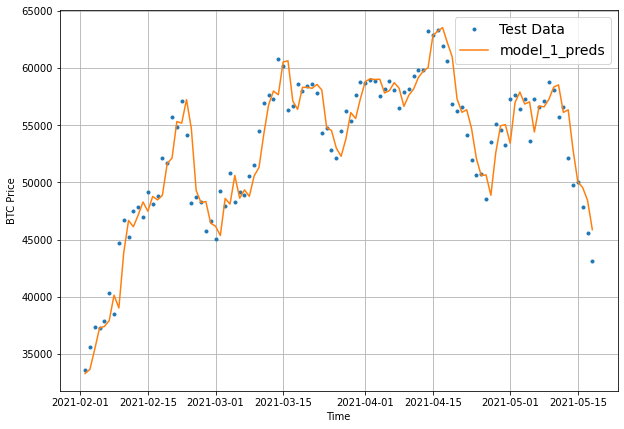

In [63]:
# Let's plot our model 1 predictions 
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label="model_1_preds")

## Model 2: Dense (window=30, horizon=1)

In [64]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past 

In [65]:

# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)
     

[[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2757, 2757)

In [66]:
train_windows.shape, train_labels.shape, test_windows.shape, test_labels.shape

((2224, 7), (2224, 1), (556, 7), (556, 1))

In [67]:

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     

(2205, 552, 2205, 552)

In [68]:
WINDOW_SIZE

30

In [69]:
# Set the seed

tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])
     
     

In [70]:
# Evaluate model_2 on test data 
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332


659.3331909179688

In [71]:
# Load in the best performing model 
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2_dense')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741


605.8740844726562

In [72]:
test_windows.shape

(552, 30)

In [73]:
model_2.predict(test_windows).shape

18/18 [==============================] - 0s 1ms/step


(552, 1)

In [74]:
# Get forecast predictions 
model_2_preds = make_preds(model_2, 
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [75]:
# Evaluate results for model 2 predictions 
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

In [76]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

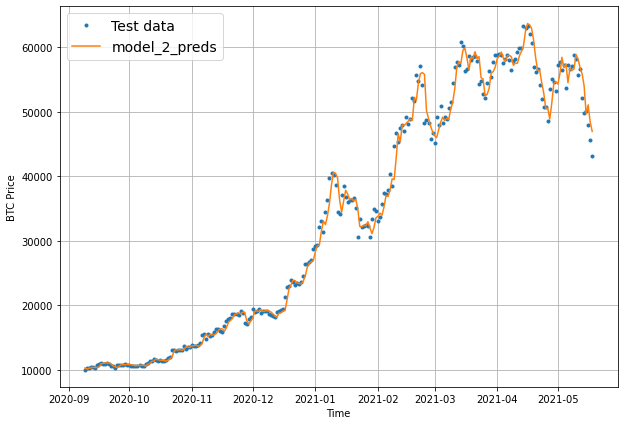

In [77]:
offset = 300 
plt.figure(figsize=(10, 7))
# Account for test _window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format='-', label="model_2_preds")

### Challenge 

##  Model 3: Dense (Window=30 and Horizon=7)

In [78]:
WINDOW_SIZE = 30 
HORIZON = 7 

In [79]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [80]:
# Make windowed data 
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

[[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2751, 2751)

In [81]:
# Make train and test windows with new sizes 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [82]:
# Set the ranfom seed 
tf.random.set_seed(42)

# 1. Creating the model (same as model 1 except with different data input and outputs)
model_3  = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')
 
# 2. Compile the model 
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# 3. Fitting the model 
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 44ms/step - loss: 1476.6752 - val_loss: 3088.5613
Epoch 2/100
18/18 [==============================] - 1s 50ms/step - loss: 552.8943 - val_loss: 2462.4548
Epoch 3/100
18/18 [==============================] - 1s 38ms/step - loss: 435.1978 - val_loss: 2283.1484
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 391.9787 - val_loss: 1975.1218
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 357.9485 - val_loss: 2000.1556
Epoch 6/100
18/18 [==============================] - 1s 35ms/step - loss: 332.6704 - val_loss: 1723.4186
Epoch 7/100
18/18 [==============================] - 2s 91ms/step - loss: 309.9903 - val_loss: 1591.9688
Epoch 8/100
18/18 [==============================] - 1s 60ms/step - loss: 302.4123 - val_loss: 1579.8518
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 293.9170 - val_loss: 1602.9116
Epoch 10/100
18/18 [==============================] - 1s

In [83]:
# Evaluate the model 
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1525


1300.1524658203125

In [84]:
# Load best version model of model_3 and evaluate 
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5063


1237.50634765625

In [85]:
# Make predicctions wit model 3
model_3_preds = make_preds(model_3, input_data=test_windows)
model_3_preds

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9004.694 ,  9048.1   ,  9425.09  , ...,  9495.797 ,  9558.453 ,
         9357.3545],
       [ 8735.506 ,  8840.303 ,  9247.793 , ...,  9097.186 ,  9174.327 ,
         9156.818 ],
       [ 8672.508 ,  8782.387 ,  9123.857 , ...,  9007.13  ,  9003.869 ,
         9042.725 ],
       ...,
       [57262.953 , 57029.24  , 58613.03  , ..., 59392.855 , 59230.98  ,
        59006.953 ],
       [56652.64  , 56577.684 , 58621.793 , ..., 59585.34  , 58991.652 ,
        58491.17  ],
       [55739.133 , 56437.55  , 57434.617 , ..., 58472.16  , 57188.76  ,
        58150.63  ]], dtype=float32)>

In [86]:
# Evaluate model 3 results 
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53293 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1576  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10805 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.8148  ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78871 ,  190.81174 ,  179.15994 ,  228.26004 ,
         314.44022 ,  379.09235 ,  278.32526 ,  295.34702 ,  299.3852  ,
         248.64983 ,  299.75668 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79555 ,  103.60121 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91273 ,  240.42912 ,
         351.00656 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.9811  ,  277.2947  ,  301.8247  ,  455.718   ,
         458.9603  ,  503.4438  ,  522.3119 

In [87]:
model_3_preds.shape, model_2_preds

(TensorShape([551, 7]), <tf.Tensor: shape=(552,), dtype=float32, numpy=
 array([ 8882.84  ,  8904.423 ,  8762.442 ,  8559.087 ,  8428.983 ,
         8327.641 ,  8256.728 ,  8126.8335,  8171.7334,  7796.058 ,
         7325.6577,  7209.108 ,  7086.571 ,  7088.627 ,  7125.4873,
         7328.0757,  7507.9004,  7594.797 ,  7616.422 ,  7437.9917,
         7401.9155,  7259.2407,  7303.4756,  7365.538 ,  7525.4897,
         7530.848 ,  7548.2666,  7428.255 ,  7184.106 ,  7258.7397,
         7140.139 ,  7315.1187,  7133.9297,  7208.6655,  6967.998 ,
         6742.6772,  7080.0107,  7248.492 ,  7093.139 ,  7293.914 ,
         7237.0957,  7260.9443,  7262.6865,  7210.3843,  7192.7495,
         7244.186 ,  7230.772 ,  7403.2314,  7343.5273,  7169.8228,
         7253.465 ,  6980.7856,  7178.303 ,  7273.955 ,  7418.6357,
         7659.6807,  7985.743 ,  8056.751 ,  7966.3237,  7972.895 ,
         8097.725 ,  8179.08  ,  8190.518 ,  8560.984 ,  8853.662 ,
         8800.606 ,  8928.045 ,  8896.012 , 

## Make our evaluation function for larger sizes 

In [88]:
model_3_results['mae'].ndim

1

In [89]:
model_2_results['mae'].ndim

0

In [90]:
tf.reduce_mean(model_3_results['mae']).numpy()

1237.5063

In [91]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different size metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase":mase.numpy()}

In [92]:
# Get model 3 results aggregated to single values 
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mse': 5405198.5,
 'rmse': 1425.7477,
 'mape': 5.5588784,
 'mase': 2.2020733}

In [93]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

We've made and evaluated predictions with `model_2, let's:
visualize, visualize, visualize 

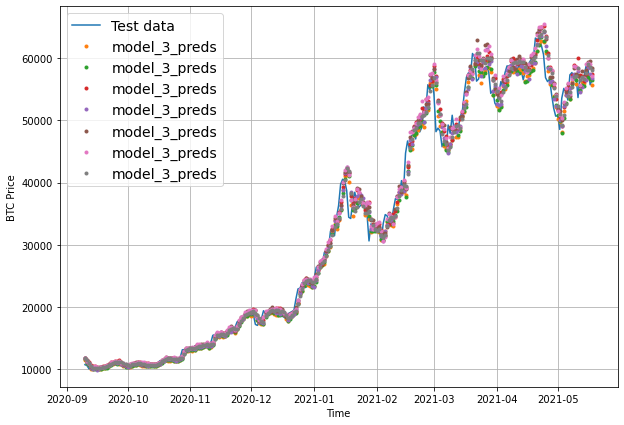

In [94]:
offset = 300 
plt.figure(figsize=(10, 7))
# Plotting model3 results 
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],format='-', start=offset, label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset,  label='model_3_preds')

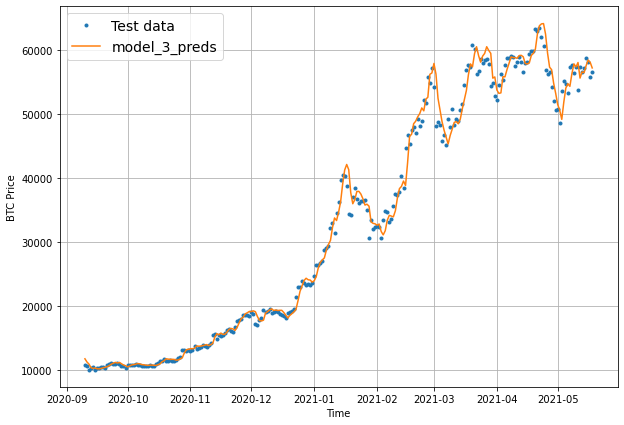

In [95]:
offset = 300 
plt.figure(figsize=(10, 7))
# Plotting model3 results 
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,  
                 format='-',
                 label='model_3_preds')

## Which of our models is performing the best so far 

So we've trained a few models, now let's compare them and see how they've gone...

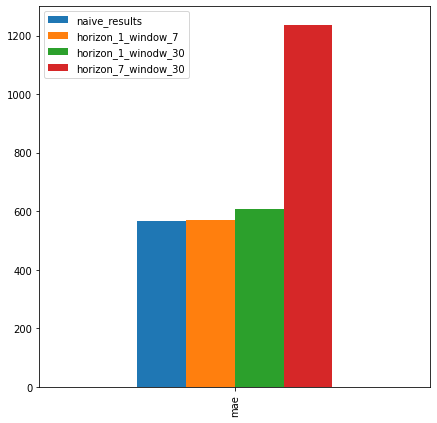

In [96]:
pd.DataFrame({"naive_results": naive_results['mae'],
              "horizon_1_window_7": model_1_results['mae'],
              "horizon_1_winodw_30": model_2_results['mae'],
              "horizon_7_window_30": model_3_results['mae']}, index=["mae"]).plot(figsize=(7, 7), kind="bar")


    🔑 Note: You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naïve model will often get fairly good results.

    📖 Resource: For more on how autocorrelation influences a model's predictions, see the article How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik


## Model 4: Conv1D 

In [97]:
HORIZON = 1  # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth of data

In [98]:
# Create windowed data 
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [99]:
# Create train/test splits 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use the Conv1D layer we need an input shape of: `(batch_size, timesteps, input_dim)`

However, our data is not in that shape yet...

In [100]:
# Check the input shape 
train_windows[0].shape  # returns (WINDOW_SIZE, )

(7,)

In [101]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works 
x = tf.constant(train_windows[0])
x 

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [102]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dims`

In [103]:
# Test out our lambda layer 
print(f'Original shape: {x.shape} ') # (WINDOW_SIZE)
print(f'Expanded shape: {expand_dims_layer(x).shape} ') 
print(f'Original values with epxanded shape:\n {expand_dims_layer(x)} ')

Original shape: (7,) 
Expanded shape: (7, 1) 
Original values with epxanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]] 


In [104]:
# Create Conv1D model 

# Set the random seed 
tf.random.set_seed(42)

# Create the Conv1D model 
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding='causal', strides=1, activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_Conv1D')

# Compile the model 
model_4.compile(loss='MAE',
                optimizer=tf.keras.optimizers.Adam())

# Fit the model 
model_4.fit(train_windows, 
            train_labels, 
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1227.0372  

18/18 [==============================] - 8s 72ms/step - loss: 1207.3817 - val_loss: 2320.6218
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 353.1946

18/18 [==============================] - 1s 36ms/step - loss: 316.2171 - val_loss: 1467.2799
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 191.0237

18/18 [==============================] - 1s 37ms/step - loss: 192.6853 - val_loss: 1164.7074
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 177.6876

18/18 [==============================] - 1s 39ms/step - loss: 177.3535 - val_loss: 981.6695
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 175.0631

18/18 [==============================] - 1s 37ms/step - loss: 172.3467 - val_loss: 960.8708
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 130.1246

18/18 [==============================] - 1s 38ms/step - loss: 171.9753 - val_loss: 950.2026
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 209.6378

18/18 [==============================] - 1s 37ms/step - loss: 167.1943 - val_loss: 943.2872
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 163.2014

18/18 [==============================] - 1s 37ms/step - loss: 163.5990 - val_loss: 905.5262
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 162.5455 - val_loss: 929.7607
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 176.2612

18/18 [==============================] - 1s 37ms/step - loss: 158.5780 - val_loss: 871.9778
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 172.6847

18/18 [==============================] - 1s 36ms/step - loss: 154.0058 - val_loss: 852.7120
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 151.2620 - val_loss: 944.1970
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 150.2688 - val_loss: 881.1826
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 145.4593

18/18 [==============================] - 1s 37ms/step - loss: 145.4593 - val_loss: 849.1818
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 143.7761

18/18 [==============================] - 1s 37ms/step - loss: 143.3640 - val_loss: 844.4007
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 131.3044

18/18 [==============================] - 1s 36ms/step - loss: 139.8764 - val_loss: 806.7261
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 138.1677 - val_loss: 812.6340
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 143.7974

18/18 [==============================] - 1s 38ms/step - loss: 137.9497 - val_loss: 775.2100
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 79.5886

18/18 [==============================] - 1s 55ms/step - loss: 131.1450 - val_loss: 755.4260
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0260

18/18 [==============================] - 1s 36ms/step - loss: 132.4057 - val_loss: 712.2014
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 130.0737

18/18 [==============================] - 1s 36ms/step - loss: 131.0829 - val_loss: 707.4122
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 126.9511

18/18 [==============================] - 1s 37ms/step - loss: 126.9511 - val_loss: 692.9736
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 132.5383

18/18 [==============================] - 1s 36ms/step - loss: 125.1489 - val_loss: 682.4753
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 124.9765

18/18 [==============================] - 1s 36ms/step - loss: 124.3786 - val_loss: 670.8320
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1436

18/18 [==============================] - 1s 38ms/step - loss: 121.6896 - val_loss: 662.6083
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 121.3545

18/18 [==============================] - 1s 36ms/step - loss: 121.5705 - val_loss: 654.6090
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 123.7676

18/18 [==============================] - 1s 36ms/step - loss: 122.6445 - val_loss: 650.9058
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 111.1428

18/18 [==============================] - 1s 36ms/step - loss: 117.9562 - val_loss: 645.4808
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 112.9740

18/18 [==============================] - 1s 35ms/step - loss: 117.1769 - val_loss: 639.9748
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 121.0468

18/18 [==============================] - 1s 35ms/step - loss: 121.0468 - val_loss: 630.7950
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9061 - val_loss: 652.6464
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9315

18/18 [==============================] - 1s 35ms/step - loss: 116.4313 - val_loss: 623.4980
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 115.7972 - val_loss: 664.3209
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 117.2043

18/18 [==============================] - 1s 55ms/step - loss: 117.2043 - val_loss: 613.7654
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4074 - val_loss: 619.6227
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 116.7781

18/18 [==============================] - 1s 37ms/step - loss: 116.8330 - val_loss: 605.7616
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 114.7925

18/18 [==============================] - 1s 36ms/step - loss: 114.7925 - val_loss: 603.6094
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 113.0861

18/18 [==============================] - 1s 36ms/step - loss: 113.0861 - val_loss: 602.5891
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 111.3780

18/18 [==============================] - 1s 37ms/step - loss: 111.9831 - val_loss: 602.2945
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 111.8693

18/18 [==============================] - 1s 68ms/step - loss: 111.2691 - val_loss: 600.5515
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0727 - val_loss: 623.0615
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7095 - val_loss: 645.0155
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 118.9676 - val_loss: 659.5667
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 125.4497 - val_loss: 678.8228
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4361 - val_loss: 611.8370
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 114.1717

18/18 [==============================] - 1s 39ms/step - loss: 114.1717 - val_loss: 589.6738
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7248 - val_loss: 720.2481
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 112.0136 - val_loss: 597.4332
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 110.5680 - val_loss: 665.2030
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 119.7653 - val_loss: 635.1696
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 111.1653

18/18 [==============================] - 1s 37ms/step - loss: 110.7739 - val_loss: 586.0245
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2179 - val_loss: 595.2483
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6466 - val_loss: 670.5778
Epoch 54/100
18/18 [==============================] - 0s 10ms/step - loss: 126.7883 - val_loss: 648.2971
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6968 - val_loss: 593.8555
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8592 - val_loss: 766.5007
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 124.8183 - val_loss: 712.2674
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 120.3515 - val_loss: 698.5149
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8185 - val_loss: 592.1150
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 1

18/18 [==============================] - 1s 38ms/step - loss: 108.1684 - val_loss: 577.6281
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7932 - val_loss: 610.1495
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4675 - val_loss: 652.9427
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7312 - val_loss: 583.0664
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3487 - val_loss: 587.8362
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0646 - val_loss: 648.5150
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6957 - val_loss: 675.1595
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3082 - val_loss: 632.9845
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3231 - val_loss: 588.5080
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 11

18/18 [==============================] - 1s 37ms/step - loss: 106.6291 - val_loss: 575.4403
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 192.2652

18/18 [==============================] - 1s 36ms/step - loss: 114.2934 - val_loss: 571.6199
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1759 - val_loss: 666.0590
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2543 - val_loss: 580.0314
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7741 - val_loss: 599.6221
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7533 - val_loss: 599.0880
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 106.9682 - val_loss: 596.5336
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9607 - val_loss: 598.1052
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 106.7720

18/18 [==============================] - 1s 36ms/step - loss: 107.3045 - val_loss: 570.8284
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0094 - val_loss: 642.3939
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7574 - val_loss: 625.3716
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0017 - val_loss: 627.3054
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 118.0999 - val_loss: 637.1274
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 111.3195 - val_loss: 579.6985
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8561 - val_loss: 572.8486
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0598 - val_loss: 602.3210
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4901 - val_loss: 616.3585
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 11

In [105]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Evaluate the model 
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 610.1541


610.154052734375

In [107]:
# Load in best performing model 
model_4 = tf.keras.models.load_model('model_experiments/model_4_Conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8284


570.828369140625

In [108]:
# Make predictions 
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.294,
       8661.667, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [109]:
# Evaluate predictions 
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                   y_pred=model_4_preds)
model_4_results

{'mae': 570.82837,
 'mse': 1176671.2,
 'rmse': 1084.7448,
 'mape': 2.5593357,
 'mase': 1.0027874}

## Model 5: RNN (LSTM)

Let's build an RNN model for our timeseries data.

We'll use the same data we created previously.

In [110]:
# Set the random seed 
tf.random.set_seed(42)

# Let's build an LSTM model with the functional API 
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
#x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name='model_5_LSTM')

# Compile the model 
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit 
model_5.fit(train_windows, 
            train_labels, 
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 10s 230ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
18/18 [==============================] - 4s 240ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
18/18 [==============================] - 3s 179ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
18/18 [==============================] - 2s 103ms/step - loss: 181.9180 - val_loss: 966.6431
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
18/18 [==============================] - 2s 121ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
18/18 [==============================] - 2s 100ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 157.6712 - val_loss: 914.8642
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 166.5143 - val_loss: 1079.0776
Epoch 10/100
18/18 [==============================] - 2

In [111]:
# Load in best version of model 5 and evaluate on the test data 
model_5 = tf.keras.models.load_model('model_experiments/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 8ms/step - loss: 594.6030


594.6029663085938

In [112]:
# Make predictions with our LSTM model 
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.46 , 8810.951, 8997.779, 8836.308, 8731.047], dtype=float32)>

In [113]:
# Evaluate model 5 predictions 
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.46 , 8810.951, 8997.779, 8836.308, 8731.047], dtype=float32)>

> 🔑**Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. 

## Make a multivariate time series

Before we add a feature to our time series, what is a feature we can use? 

One feature we could add is wether or not Daniel Bourke tweeted on that day... 

* day 1 - 0
* day 2 - 1
* day 3 - 0 

What's a better feature to use?

How about the bitcoin halving event?
https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving



In [114]:
# Let's make a multivariate time series 
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [115]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 october 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.50  # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020 

# Block reward dates 
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [116]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [117]:
# Create data ranges of where specific block_rewards values should be 
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [118]:
# Add in a block_reward column 
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block_reward value to our DataFrame 
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4 

In [119]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


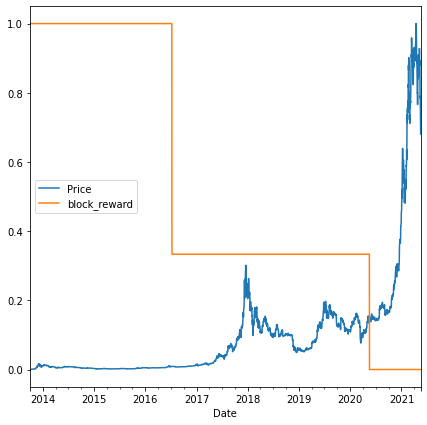

In [120]:
# Plot the block reward vs price over time 
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                  columns=bitcoin_prices_block.columns,
                                                  index=bitcoin_prices_block.index)


scaled_price_block_df.plot(figsize=(7, 7))

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our mmultivariate data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [121]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [122]:
# Make a copy of the Bitcoin historical data with block reward 
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# 1dd in windowed columns
for i in range(WINDOW_SIZE):  # sift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f'Prices+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed

,Price,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


What we've done is created a way to window our dataset directly from a pandas dataframe.
```
[ 0, 1, 2, 3, 4, 5, 6, block_reward] -> 7
[ 1, 2, 3, 4, 5, 6, 7, block_reward] -> 8
[ 2, 3, 4, 5, 6, 7, 8, block_reward] -> 9
``` 

In [123]:
# Create X (windows) and y(horizons) features 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [124]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [125]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [126]:
# Set random seed 
tf.random.set_seed(42)

# Create multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

# Compile the model 
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit the model 
model_6.fit(X_train, 
            y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 2s 108ms/step - loss: 708.7571 - val_loss: 2263.3035
Epoch 2/100
18/18 [==============================] - 1s 66ms/step - loss: 209.3599 - val_loss: 882.9350
Epoch 3/100
18/18 [==============================] - 1s 58ms/step - loss: 155.8662 - val_loss: 819.8377
Epoch 4/100
18/18 [==============================] - 1s 56ms/step - loss: 146.5632 - val_loss: 799.7484
Epoch 5/100
18/18 [==============================] - 1s 53ms/step - loss: 132.3965 - val_loss: 693.0831
Epoch 6/100
18/18 [==============================] - 1s 57ms/step - loss: 125.7849 - val_loss: 659.4670
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 122.0054 - val_loss: 715.4888
Epoch 8/100
18/18 [==============================] - 2s 104ms/step - loss: 120.0701 - val_loss: 636.3213
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 118.8690 - val_loss: 813.5286
Epoch 10/100
18/18 [==============================] - 0s 6ms/s

In [127]:
# Evaluate multivariate model 
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 664.8984


664.8983764648438

In [128]:
# Load in and evaluate best performing model 
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 568.8129


568.8128662109375

In [129]:
# Make predictions with multivariate model 
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8815.29 , 8771.752, 9053.797, 8730.462, 8721.518, 8752.402,
       8654.197, 8493.691, 8457.62 , 8522.896], dtype=float32)>

In [130]:
# Evaluate predictions to get eval metrics 
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 568.81287,
 'mse': 1164401.9,
 'rmse': 1079.0745,
 'mape': 2.553637,
 'mase': 0.99924666}

In [131]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

For a challenge on different ways to potentially improve the multivariate time series model, see the reference here:
https://dev.mrdbourke.com/tensorflow-deep-learning/09_SkimLit_nlp_milestone_project_2/

### Challenge: Creating multi-input model 

In [132]:
bitcoin_prices_windowed.head()

,Price,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [133]:
# Creating different train and test splits 
split_size = int(len(X) * 0.8) 

# Getting the different variable output 
block_reward_df = bitcoin_prices_windowed['block_reward'].astype(np.float32)
windowed_df = bitcoin_prices_windowed.dropna().drop(["Price", 'block_reward'], axis=1).astype(np.float32)
price_df = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

# Creating train test splits 
block_train = tf.squeeze(block_reward_df[:split_size])
block_test = tf.squeeze(block_reward_df[split_size+7:])

window_train = windowed_df[:split_size]
window_test = windowed_df[split_size:]

price_train = price_df[:split_size]
price_test = price_df[split_size:]

In [134]:
# Checking the length 
len(block_train), len(block_test), len(window_train), len(window_test), len(price_train), len(price_test)

(2224, 556, 2224, 556, 2224, 556)

In [135]:
window_train.shape, block_train.shape

((2224, 7), TensorShape([2224]))

In [136]:
# Set the random seed
tf.random.set_seed(42)

# Create multi-inpuut model 
windows_inputs = layers.Input(shape=(7), dtype=tf.float32, name='input_windows')
x = layers.Dense(128)(windows_inputs)
windows_outputs = layers.Dense(HORIZON, activation='relu')(x)
windows_model = tf.keras.Model(windows_inputs, windows_outputs, name='window_model')

block_inputs = layers.Input(shape=(1), dtype=tf.float32, name='input_blocks')
x = layers.Dense(128)(block_inputs)
block_outputs = layers.Dense(HORIZON, activation='relu')(x)
block_model = tf.keras.Model(block_inputs, block_outputs, name='block_model')

# Concatenate the outputs of the layers 
concat_layer = layers.Concatenate(name='concat')([windows_model.output,
                                                  block_model.output])
# Create output layer 
output_layer = layers.Dense(HORIZON)(concat_layer)

# Create model 
model_00 = tf.keras.Model(inputs= [windows_model.inputs,
                                   block_model.inputs],
                          outputs=output_layer,
                          name='hybrid_model')

In [137]:
model_00.summary()

Model: "hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_windows (InputLayer)     [(None, 7)]          0           []                               
                                                                                                  
 input_blocks (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 128)          1024        ['input_windows[0][0]']          
                                                                                                  
 dense_13 (Dense)               (None, 128)          256         ['input_blocks[0][0]']           
                                                                                       

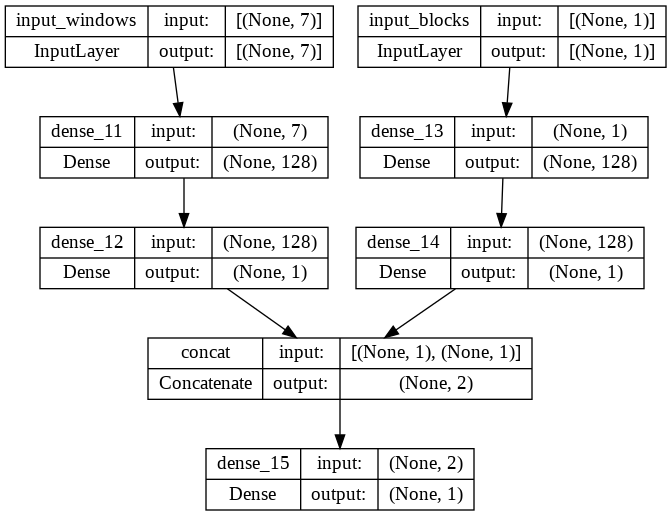

In [138]:
from tensorflow.keras.utils import plot_model

plot_model(model_00, show_shapes=True)

In [139]:
# Compile the hybrid model 
model_00.compile(loss='mae',
                 optimizer=tf.keras.optimizers.Adam())

In [140]:
# Zip both train sets together 
# hybrid_train_data = tf.data.Dataset.from_tensor_slices((window_train, block_train))
# hybrid_y_train = tf.data.Dataset.from_tensor_slices(price_train)
# hybrid_train_dataset = tf.data.Dataset.zip((hybrid_train_data, hybrid_y_train))

# # test dataset 
# hybrid_test_data = tf.data.Dataset.from_tensor_slices((window_test, block_test))
# hybrid_y_test = tf.data.Dataset.from_tensor_slices(price_test)
# hybrid_test_dataset = tf.data.Dataset.zip((hybrid_test_data, hybrid_y_test))


# hybrid_train_data, hybrid_test_data

In [141]:
window_train.shape, block_train.shape, price_train.shape

((2224, 7), TensorShape([2224]), (2224,))

In [142]:
# Fit the model 
#model_00.fit([window_train,block_train],
# price_train,
              # epochs=100, 
              # validation_data=([window_test,block_test],
              # price_test))


## Model 7: N-BEATS algorithm 

Let's now build the biggest time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 in the following paper:
https://arxiv.org/abs/1905.10437

Why?

* This will allow us to practice reprlicating a paper with TensorFlow code 
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on owr problems.


### Building and testing the NBEATS block layer

Because the N-Beats block layer doesn't exist in TensorFlow, we've got to create it.
To create custom layers and models in TensorFlow we can use subclassing.
https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [143]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layers
               input_size: int,
               theta_size: int,
               horizon:int,
               n_neurons: int,
               n_layers:int,
               **kwargs):  # the **kwargs arguments takes care of all the arguments for the parent class (input_shape, trainable, name)
   super().__init__(**kwargs)
   self.input_size = input_size
   self.theta_size = theta_size 
   self.horizon = horizon 
   self.n_neurons = n_neurons 
   self.n_layers = n_layers 

   # Block contains stack of 4 fully connected layers each has ReLU activation 
   self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
   # Output of block is a theta layer with linear activation 
   self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs):
    x = inputs 
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta 
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]
    return backcast, forecast

Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs.

In [144]:
# Set up dummy NbeatBlock layer 
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast+forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [145]:
# Create dummy inputs (have to be same size as input_size )
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) # input shape to the model has to reflect the dense layer input requirements
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [146]:
# Pass dummy inputs to dummy NBeatsBlock layer 
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f'Backcast: {tf.squeeze(backcast.numpy())} ')
print(f'Forecast: {tf.squeeze(forecast.numpy())} ')

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ] 
Forecast: 1.0071648359298706 


### Preparing data for the N-Beats algorithm using `tf.data`

To make our input data load as fast as possible, we're going to be adhering to the performant data pipeline steps in the tf.data guide
https://www.tensorflow.org/guide/data_performance

In [147]:
HORIZON = 1
WINDOW_SIZE = 7

In [148]:
# Create N-Beats inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [149]:
# Add windowed columns 
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [150]:
# Make features and labels 
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test splits 
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [151]:
# Time to make our dataset performant using tf.data API 
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch 
BATCH_SIZE = 1024

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-Beats algorithm

The Nbeats algorithm has a fair few number of hyperparameters, many of them can be founf in Table 18.

In [152]:
# Values for N-Beats paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON 

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for the residual connections 

Before we can craft our N-Beats model, we need two layers for the residual connections (substract and add).

The N-Beats algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper)

For more on residual neural networks: https://en.wikipedia.org/wiki/Residual_neural_network

And here:
* https://arxiv.org/abs/1512.03385
*https://paperswithcode.com/area/methodology


In [153]:
# Make tensors 
tensor_1 = tf.range(10) + 10 
tensor_2 = tf.range(10)

# Subtract 
subtracted = layers.subtract([tensor_1, tensor_2])

# Add 
added = layers.add([tensor_1, tensor_2])

# Get outputs 
print(f'Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()} ')
print(f'Substracted: {subtracted.numpy()} ')
print(f'Added: {added.numpy()} ')

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9] 
Substracted: [10 10 10 10 10 10 10 10 10 10] 
Added: [10 12 14 16 18 20 22 24 26 28] 


In [154]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

### Building, compiling and fitting the N-BEATS model 

1. Setup an instance of the N-BEATS block layer using `N-BeatsBlock` (this will be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1).
4. Use for loop to create stacks of block layers.
5. Use the `N-Beats` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts.
6. Create the double residual stacking using substract and add layers.
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it in line with our other models) and Adam optimizer with default setting as per section 5.2 of the N-BEATS paper.
9. Fit the N-BEATS for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks: 
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving.
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance)


In [155]:


%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
     



Epoch 390: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 490: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 31s, sys: 2.48 s, total: 1min 33s
Wall time: 1min 50s


In [156]:
# Evaluate N-Beats model on the test dataset 
model_7.evaluate(test_dataset)



1/1 [==============================] - 0s 18ms/step - loss: 588.9625 - mae: 588.9625 - mse: 1206368.1250


[588.9625244140625, 588.9625244140625, 1206368.125]

In [157]:
# Make predictions with N-Beats model 
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8925.502, 8839.322, 9061.677, 8803.031, 8866.868, 8750.045,
       8676.716, 8574.235, 8498.425, 8544.158], dtype=float32)>

In [158]:
# Evaluate N-BEATS model preds 
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results 


{'mae': 588.9625,
 'mse': 1206368.1,
 'rmse': 1098.3479,
 'mape': 2.7419171,
 'mase': 1.034644}

In [159]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

In [160]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Even with all those special layers and hand-crafted network, it looks like the n-BEATS model doesn't perform as well as model_1 or the original naive-forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are suited for a certain type of data.

### Plot the N-BEATS architecture we've created 


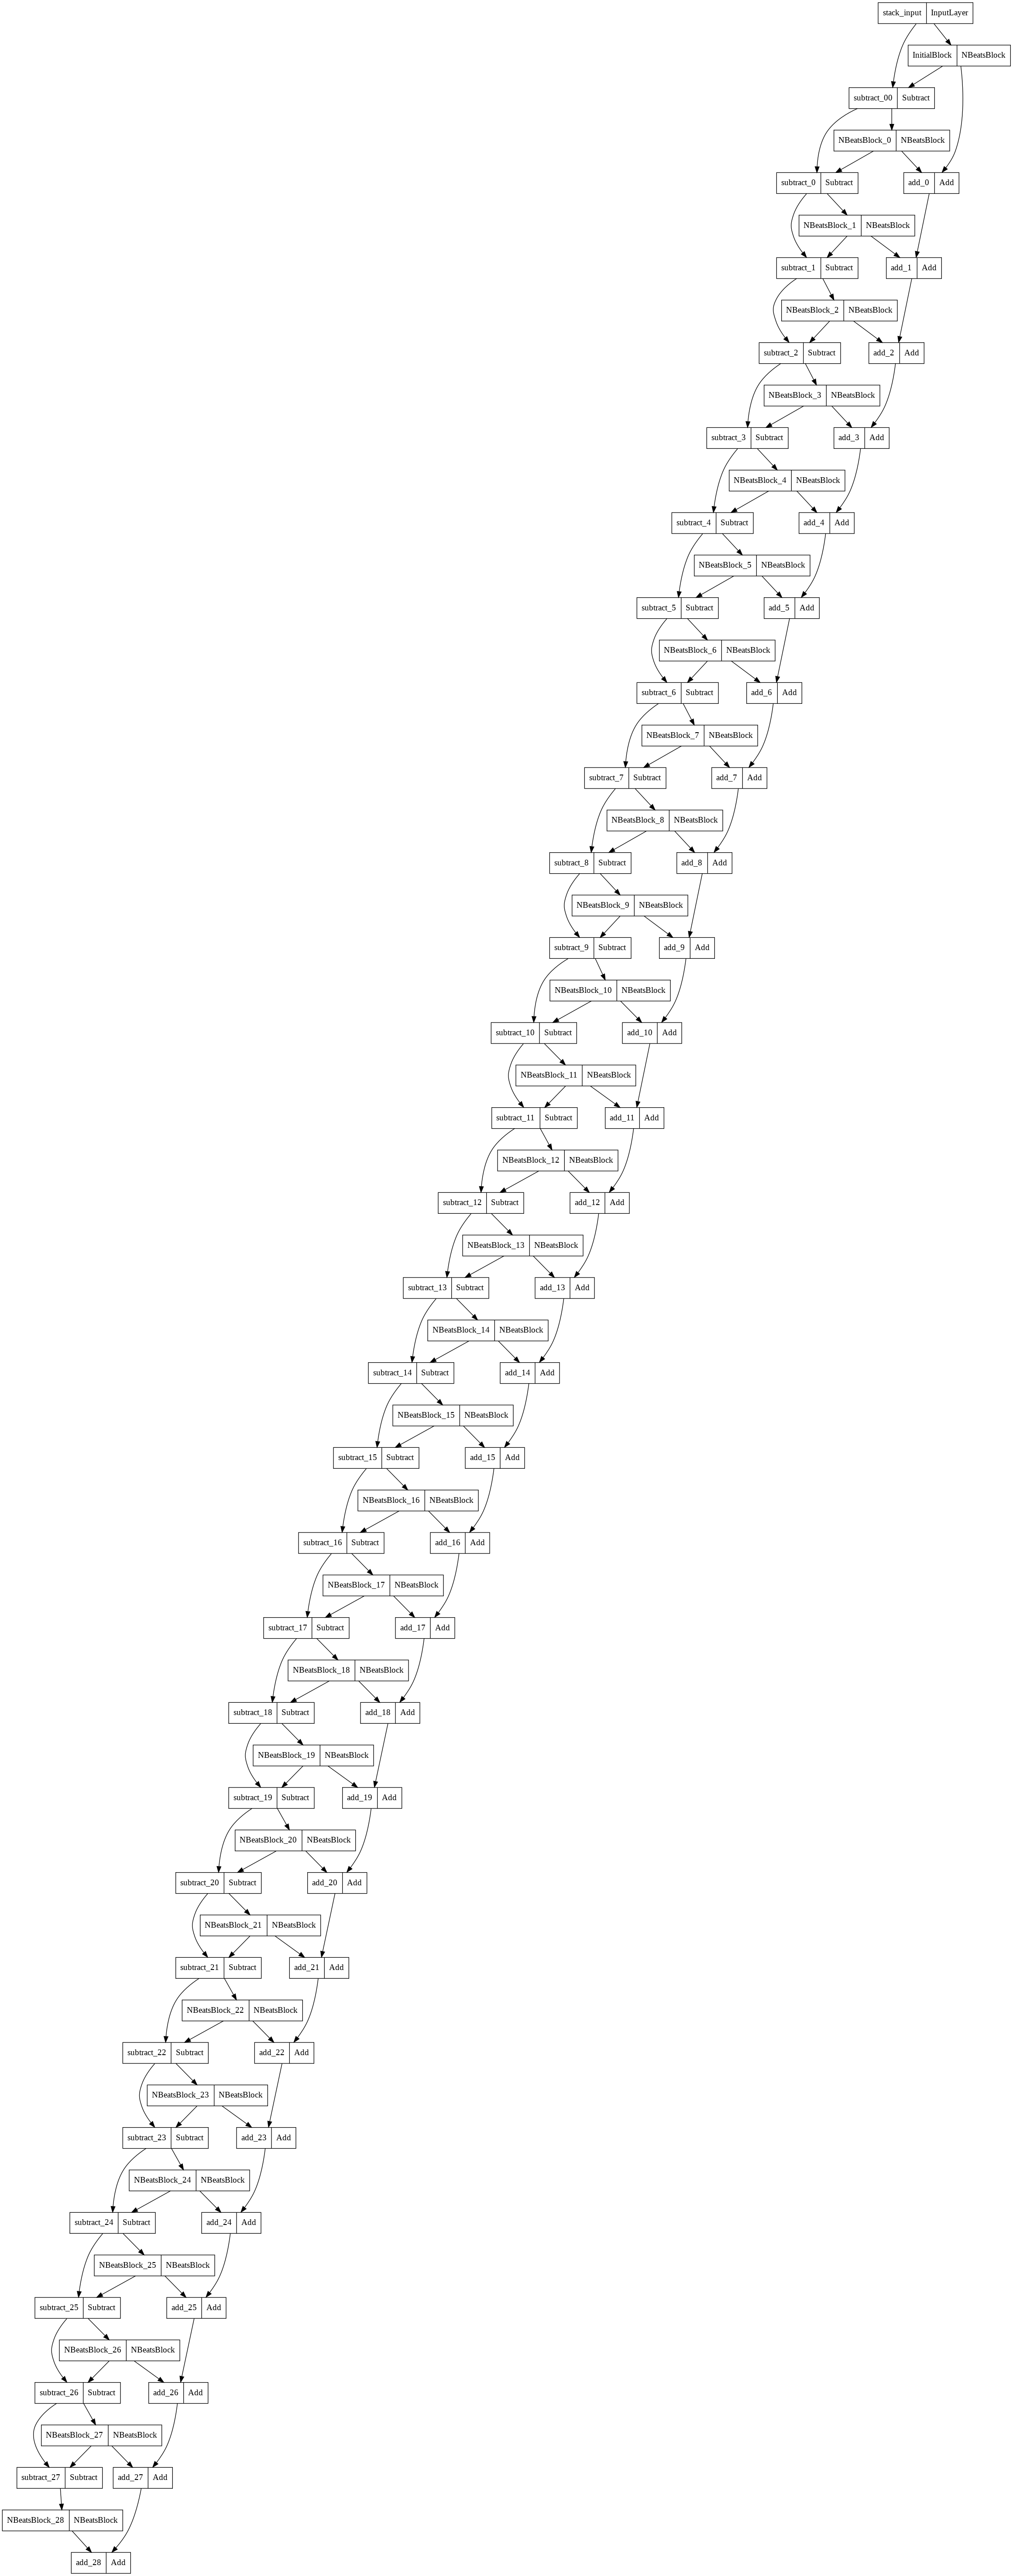

In [161]:
# Plot the N-BEATS model and inspect the architecture 
from tensorflow.keras.utils import plot_model 

plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverage the wisdom of the crowd effect.

It combines many *different* models to predict a common goal

In [162]:
HORIZON, WINDOW_SIZE 

(1, 7)

### Constructing and fitting an ensemble of models (using different loss functions)

In [163]:


def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models
     


In [164]:
%%time 
# Get list of trained ensemble models 
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 898: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 612: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 728: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 828: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 419: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 519: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [165]:
len(ensemble_models)

15

In [166]:
ensemble_models

In [167]:
!nvidia-smi

Mon Dec 12 07:54:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    29W /  70W |   1938MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Make predictions with our ensemble model 

In [168]:
# Create a function which uses a list of models to make and returns a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [169]:
# Create a list of ensemble of predictions 
%%time 
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 54ms/step
CPU times: user 896 ms, sys: 50.4 ms, total: 946 ms
Wall time: 1.33 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8809.537 ,  8776.171 ,  9037.881 , ..., 50125.953 , 49193.766 ,
        46593.4   ],
       [ 8766.836 ,  8743.353 ,  9054.608 , ..., 49365.227 , 48523.547 ,
        45335.8   ],
       [ 8745.424 ,  8733.034 ,  9101.386 , ..., 49267.164 , 47660.426 ,
        45370.047 ],
       ...,
       [ 8842.136 ,  8771.373 ,  9094.977 , ..., 49482.832 , 49351.52  ,
        46232.26  ],
       [ 8728.715 ,  8806.174 ,  9103.728 , ..., 49596.86  , 48532.195 ,
        45057.137 ],
       [ 8815.881 ,  8760.732 ,  9040.1455, ..., 49717.688 , 48045.24  ,
        45825.656 ]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to continue into point predictions we can leverage the mean of all the predictions
https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [170]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8786.361 , 8777.801 , 9065.062 , 8728.692 , 8745.031 , 8715.07  ,
       8661.8955, 8476.411 , 8458.753 , 8524.923 ], dtype=float32)>

In [171]:
# Evaluate our ensemble model predictions 
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 566.668,
 'mse': 1143119.2,
 'rmse': 1069.1676,
 'mape': 2.577457,
 'mase': 0.99547875}

In [172]:
# Evaluate our ensemble model predictions 
ensemble_results2 = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 566.668,
 'mse': 1143119.2,
 'rmse': 1069.1676,
 'mape': 2.577457,
 'mase': 0.99547875}

In [173]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds
     


1/1 [==============================] - 0s 8ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8809.537 ,  8776.171 ,  9037.881 , ..., 50125.953 , 49193.766 ,
        46593.4   ],
       [ 8766.836 ,  8743.353 ,  9054.608 , ..., 49365.227 , 48523.547 ,
        45335.8   ],
       [ 8745.424 ,  8733.034 ,  9101.386 , ..., 49267.164 , 47660.426 ,
        45370.047 ],
       ...,
       [ 8842.136 ,  8771.373 ,  9094.977 , ..., 49482.832 , 49351.52  ,
        46232.26  ],
       [ 8728.715 ,  8806.174 ,  9103.728 , ..., 49596.86  , 48532.195 ,
        45057.137 ],
       [ 8815.881 ,  8760.732 ,  9040.1455, ..., 49717.688 , 48045.24  ,
        45825.656 ]], dtype=float32)>

### Plotting the predictions intervals (uncertainty estimates) of our ensemble

So far, we've been making point predictions with our models.

E.g horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50.000USD. 

Wouldn'it be helpful if we knew a range of where that prediction came from? 

Instead of 50.000 USD on the dot, how about 48.000 to 52.000 USD? 

To get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions 
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observation fall within 1.96 standard deviation of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the prediction made in (1).

*  https://www.uber.com/blog/neural-networks-uncertainty-estimation/
*  https://en.wikipedia.org/wiki/97.5th_percentile_point

In [174]:
tf.math.reduce_std(ensemble_preds, axis=0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 33.519455,  20.380787,  30.77168 ,  41.240723,  36.86754 ,
        33.759403,  29.589165,  41.614178,  27.464363,  18.81182 ,
        26.40804 ,  25.330849,  24.392677,  32.214237,  39.08737 ,
        42.82069 ,  50.135025,  30.981644,  46.944828,  40.768364,
        34.538067,  30.321098,  37.23013 ,  41.915955,  35.166656,
        25.793222,  28.97527 ,  23.684206,  19.855476,  15.296562,
        28.430212,  26.096071,  20.68018 ,  13.886165,  20.187376,
        31.194572,  28.11183 ,  20.295633,  23.648838,  18.381474,
        50.569534,  41.2026  ,  57.394604,  51.4783  ,  74.71854 ,
        55.430492,  19.146067,  17.961643,  17.36291 ,  21.061176,
        17.63936 ,  17.82314 ,  25.189709,  21.338348,  15.353641,
        16.104876,  23.533747,  22.857883,  23.899624,  51.452545,
        39.527996,  28.561459,  30.717752,  40.36874 ,  36.181618,
        18.146334,  37.817158,  31.42599 ,  37.17437 ,  42.299206,
        51.130

In [175]:
# Find the upper and lower bounds of ensemble predictions 
def get_upper_lower(preds):  # 1. Take the predictions from a number of randomly initialized models

  # 2. Measure the standard deviation of the predictions 
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std 

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval 

  return lower, upper 

In [176]:
# Get the upper and lpower bounds of the 95% percent prediction interval 
lower, upper = get_upper_lower(preds=ensemble_preds)

📖**Resource:** Many of the steps we've taken above have been referenced from the Machine Learning Mastery blog post on:
https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

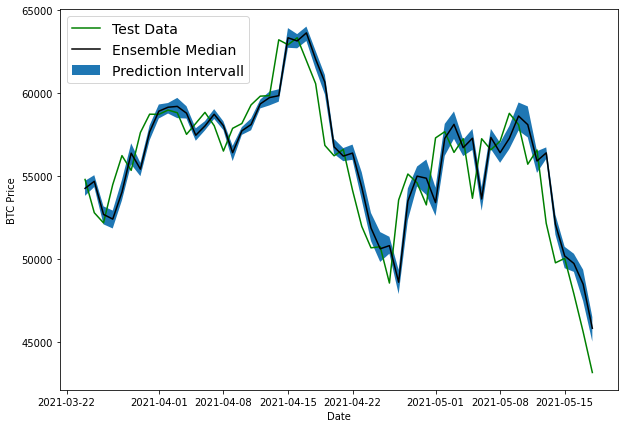

In [177]:
# Get the median/mean value of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between )
offset = 500 
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label='Test Data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel('BTC Price')
# To plot the upper and lower bounds, let's use fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],label='Prediction Intervall')
plt.legend(loc='upper left', fontsize=14);


So far, all of our models predictiobs have been lagging behind the test data...

As if they're replicating what the naive mmodel does and just predict the previous timestep as the next timestep.

> 🔑**Note:** These predictions intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to lean?)
2. What doesn't my model know? (what can a model never predict? Or would it be helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it' right?

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often reffered as "data" uncertainty or "subway" uncertainty.
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also can be reffered to as 'model' or 'coconut' uncertainty.

https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty 

## Model 9:Train a model on the full historical data to make predictions into the future

So far, all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future.

In [178]:
HORIZON = 1
WINDOW_SIZE= 7

In [179]:
bitcoin_prices_windowed.head()

,Price,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [180]:
bitcoin_prices_windowed.head()

,Price,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [181]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [182]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [183]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels 
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance 
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [184]:
# Set random seed 
tf.random.set_seed(42)

# Buiding model 9 
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_9_future_model')

# Compile the model 
model_9.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit the model 
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

## Make predictions into future

In [185]:
# How many timesteps to predict int othe future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
 * a list of values (Bitcoin historical data)
 * a trained model (such as `model_9`)
 * a window into the future to predict (our `ÌNTO_FUTURE` variable)
 * the window size a model was trained on the same kind of data it was trained on.
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values.
3. Loop `INTO_FUTURE` time making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction.

In [186]:
# def bitpredict(historic_data,model,futur_pred=INTO_FUTURE,window_size):
#   """
#   function that takes inputs and a model and returns predictions 
#   """
#   future_forecast = []
#   for i in range(window_size):
#     future_forecast = model.predict(historic_data)


In [187]:
# 1. Create function to make predictions into the future 
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:  
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecast as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecasts on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again (our model will eventually make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f'Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n ')

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast


> 🛠 **Exercise:** In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.

So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.

As it is, the make_future_forecasts() function skips the retraining of a model part.


In [188]:
# Make forecasts into the future 
future_forecasts = make_future_forecasts(values=y_all,
                                         model=model_9,
                                         into_future=INTO_FUTURE,
                                         window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 137ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.47265625
 
1/1 [==============================] - 0s 46ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.47265625] -> Prediction: 50985.9296875
 
1/1 [==============================] - 0s 80ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.47265625 50985.9296875 ] -> Prediction: 48522.9609375
 
1/1 [==============================] - 0s 79ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.47265625 50985.9296875  48522.9609375 ] -> Prediction: 48137.19921875
 
1/1 [==============================] - 0s 87ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.47265625
 50985.9296875  48522.9609375  48137.199

### Plot future forecasts

In [189]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Return array of values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, 'D') # Specify start date, 'D' stands for day
  end_date = start_date + np.timedelta64(into_future, 'D') # specify end date

  return np.arange(start_date, end_date, dtype='datetime64') # returns a data range between start and end date 

In [190]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps (currently np.datetime64 format)
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

In [ ]:
# Insert last timestep/final proce into next time steps and future forecasts so the plot doesn't look janky 
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

In [ ]:
# Plot future prices predictions of Bitcoin 
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label='Actual BTC Price')
plot_time_series(next_time_steps, future_forecast, format='-', label="Predicted BTC Price")

In [ ]:
# Plotting future forecasts 
# plt.figure(figsize=(10, 7))
# plt.plot(future_forecasts, 'g')
# plt.title('Bitcoin Forecasts')

## Model 10: Why forecasting is BS (the turkey problem) 🦃



In [ ]:
# Let's introduce a turkey problem in our BTC dataset (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manifacture an extra price on the end (to showcase our turkey problem)
btc_price_turkey[-10:]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format='-',
                 label='BTC price + Turkey problem',
                 start=2500)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create train and test sets for Turkey problem data 
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
model_1.summary()

## Build a turkey model (model to predict on turkey data)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.clone_model(model_1)
turkey_model._name = 'model_10_turkey'

# Compile 
turkey_model.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())

# Fit the model 
turkey_model.fit(X_train, 
                y_train, 
                epochs=100,
                verbose=0,
                batch_size=128,
                validation_data=(X_test, y_test),
                callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate the turkey model on test data
model_10.evaluate(X_test, y_test)

In [ ]:
# Load in best performing turkey model and evaluate on test data 
turkey_model = tf.keras.models.load_model('')
turkey_model.evaluate(X_test, y_test)

In [ ]:
# Make predictions 
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

In [ ]:
# Evaluate turkey preds 
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

In [ ]:
model_1_results

In [ ]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc__timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey,
                 format='-',
                 label='Turkey test data', 
                 start=offset)
plot_time_series(timesteps=btc__timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label='Turkey preds',
                 start=offset);

## Compare models 

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({'naive_model':naive_results,
                             'model_1_dense_w7_h1': model_1_dense,
                             'model_2_dense_w30_h1': model_2_dense,
                             'model_3_dense_w30_h7':model_3_dense,
                             'model_4_CONV1D':model_4_Conv1D,
                             'model_5_LSTM':model_5_LSTM,
                             'model_6_multivariate':model_6_multivariate,
                             'model_7_NBEATS':model_7_NBEATS,
                             'model_8_ensemble':ensemble_results,
                             'model_10_turkey':model_10_turkey}).T
model_results.head()

In [ ]:
# Sort model results by MAE and plot them 
model_results[['mae']].sort_values(by='mae').plot(figsize=(10, 7), kind='bar');

# Exercises

### 1. Scaling the data

In [162]:
train_windows, train_labels

(array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
          120.65533   ,  121.795     ],
        [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
          121.795     ,  123.033     ],
        [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
          123.033     ,  124.049     ],
        ...,
        [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
         9369.62808116, 9326.59962378],
        [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
         9326.59962378, 9335.75240233],
        [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
         9335.75240233, 9226.48582088]]), array([[ 123.033     ],
        [ 124.049     ],
        [ 125.96116   ],
        ...,
        [9335.75240233],
        [9226.48582088],
        [8794.35864452]]))

In [ ]:
# Scaling the data with scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_windows)
test_scaled = scaler.transform(test_windows)

train_scaled

In [ ]:
# Fitting model_1 on scaled data
model_1.fit(train_scaled, 
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_scaled, test_labels))

In [ ]:
# Evaluating model_1 trained with scaled data
model_1.evaluate(test_scaled, test_labels)